In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from pathlib import Path

In [2]:
# Set plot style and suppress warnings for cleaner outputs
sns.set_style('whitegrid')
warnings.filterwarnings('ignore')

# Load the merged dataset
try:
    df = pd.read_csv('D:/github/python projects/Analysis/sustainable_goal_affordable_ and_clean_renewable_enargy/Analysis/Affordable_Clean_Energy_Project/data/processed/affordable_and_clean_energy_merged.csv')
    print("✅ Dataset 'affordable_and_clean_energy_merged.csv' loaded successfully!")
    print(f"Shape of the dataset: {df.shape}")
except FileNotFoundError:
    print("❌ Error: 'affordable_and_clean_energy_merged.csv' not found. Please run the data merging script first.")

✅ Dataset 'affordable_and_clean_energy_merged.csv' loaded successfully!
Shape of the dataset: (8198, 9)


In [3]:
# Display basic information and data types
print("\n--- Data Info ---")
df.info()

# Display descriptive statistics for all numerical columns
print("\n--- Descriptive Statistics ---")
# We transpose (.T) for a cleaner, vertical layout
display(df.describe().T)


--- Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8198 entries, 0 to 8197
Data columns (total 9 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Entity                               8198 non-null   object 
 1   Code                                 8198 non-null   object 
 2   Year                                 8198 non-null   int64  
 3   Access_Clean_Fuels_Pct               5148 non-null   float64
 4   Energy_Intensity_MJ_per_GDP          4799 non-null   float64
 5   Clean_Energy_Finance_Flows_USD       3772 non-null   float64
 6   Renewable_Capacity_per_Capita_Watts  5474 non-null   float64
 7   Renewable_Energy_Share_Pct           5290 non-null   float64
 8   Access_to_Electricity_Pct            6707 non-null   float64
dtypes: float64(6), int64(1), object(2)
memory usage: 576.6+ KB

--- Descriptive Statistics ---


,count,mean,std,min,25%,50%,75%,max
Year,8198.0,2.008325e+03,8.973714e+00,1990.000000,2001.000000,2009.000,2.016000e+03,2.023000e+03
Access_Clean_Fuels_Pct,5148.0,6.417944e+01,3.819745e+01,0.000000,25.800000,83.300,1.000000e+02,1.000000e+02
Energy_Intensity_MJ_per_GDP,4799.0,5.342245e+00,3.442579e+00,0.110000,3.180000,4.390,6.350000e+00,3.044000e+01
Clean_Energy_Finance_Flows_USD,3772.0,1.938550e+08,1.087269e+09,0.000000,0.000000,580000.000,3.575250e+07,2.845413e+10
Renewable_Capacity_per_Capita_Watts,5474.0,2.920417e+02,7.259140e+02,0.000000,8.407500,63.365,3.076850e+02,8.184330e+03
Renewable_Energy_Share_Pct,5290.0,2.816512e+01,2.874829e+01,0.000000,4.410000,16.910,4.670000e+01,9.834000e+01
Access_to_Electricity_Pct,6707.0,8.176212e+01,2.885383e+01,0.533899,72.383315,99.200,1.000000e+02,1.000000e+02


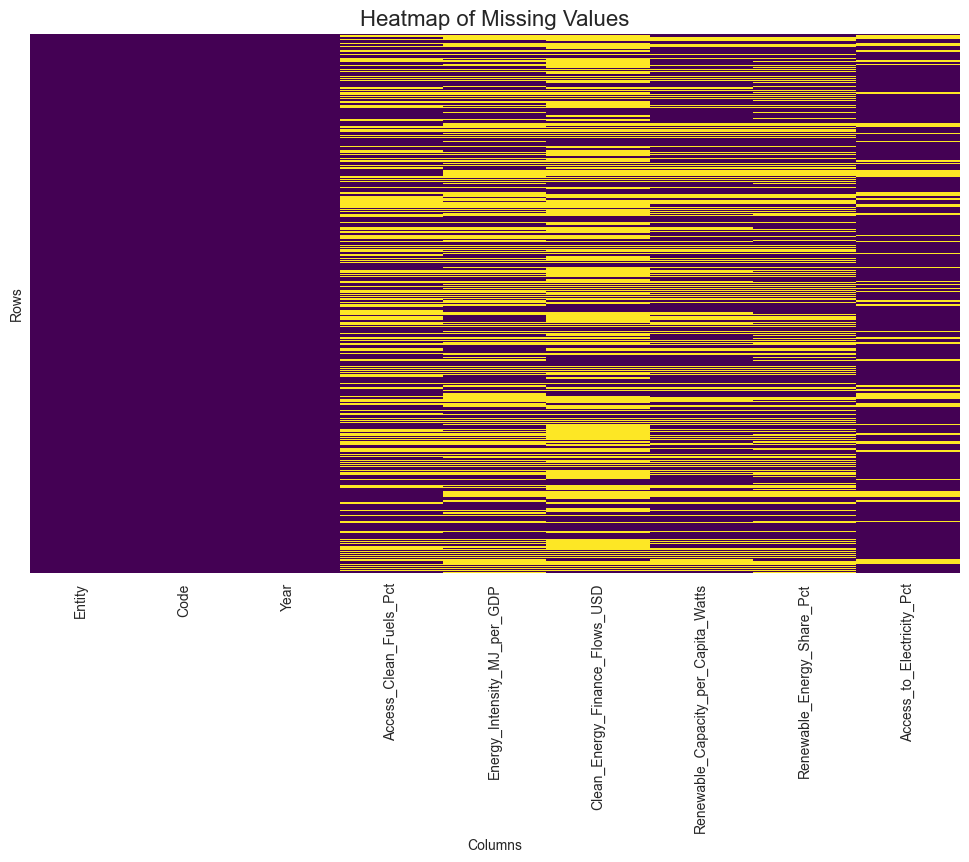

In [4]:
plt.figure(figsize=(12, 7))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Heatmap of Missing Values', fontsize=16)
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.show()

             Entity Code  Year  Access_Clean_Fuels_Pct  \
0       Afghanistan  AFG  2000                    6.20   
1       Afghanistan  AFG  2001                    7.10   
2       Afghanistan  AFG  2002                    8.30   
3       Afghanistan  AFG  2003                    9.35   
4       Afghanistan  AFG  2004                   10.80   
..              ...  ...   ...                     ...   
152  American Samoa  ASM  2013                     NaN   
153  American Samoa  ASM  2014                     NaN   
154  American Samoa  ASM  2015                     NaN   
155  American Samoa  ASM  2016                     NaN   
156  American Samoa  ASM  2017                     NaN   

     Energy_Intensity_MJ_per_GDP  Clean_Energy_Finance_Flows_USD  \
0                           1.50                         30000.0   
1                           1.50                        140000.0   
2                           1.40                       4390000.0   
3                           1.3

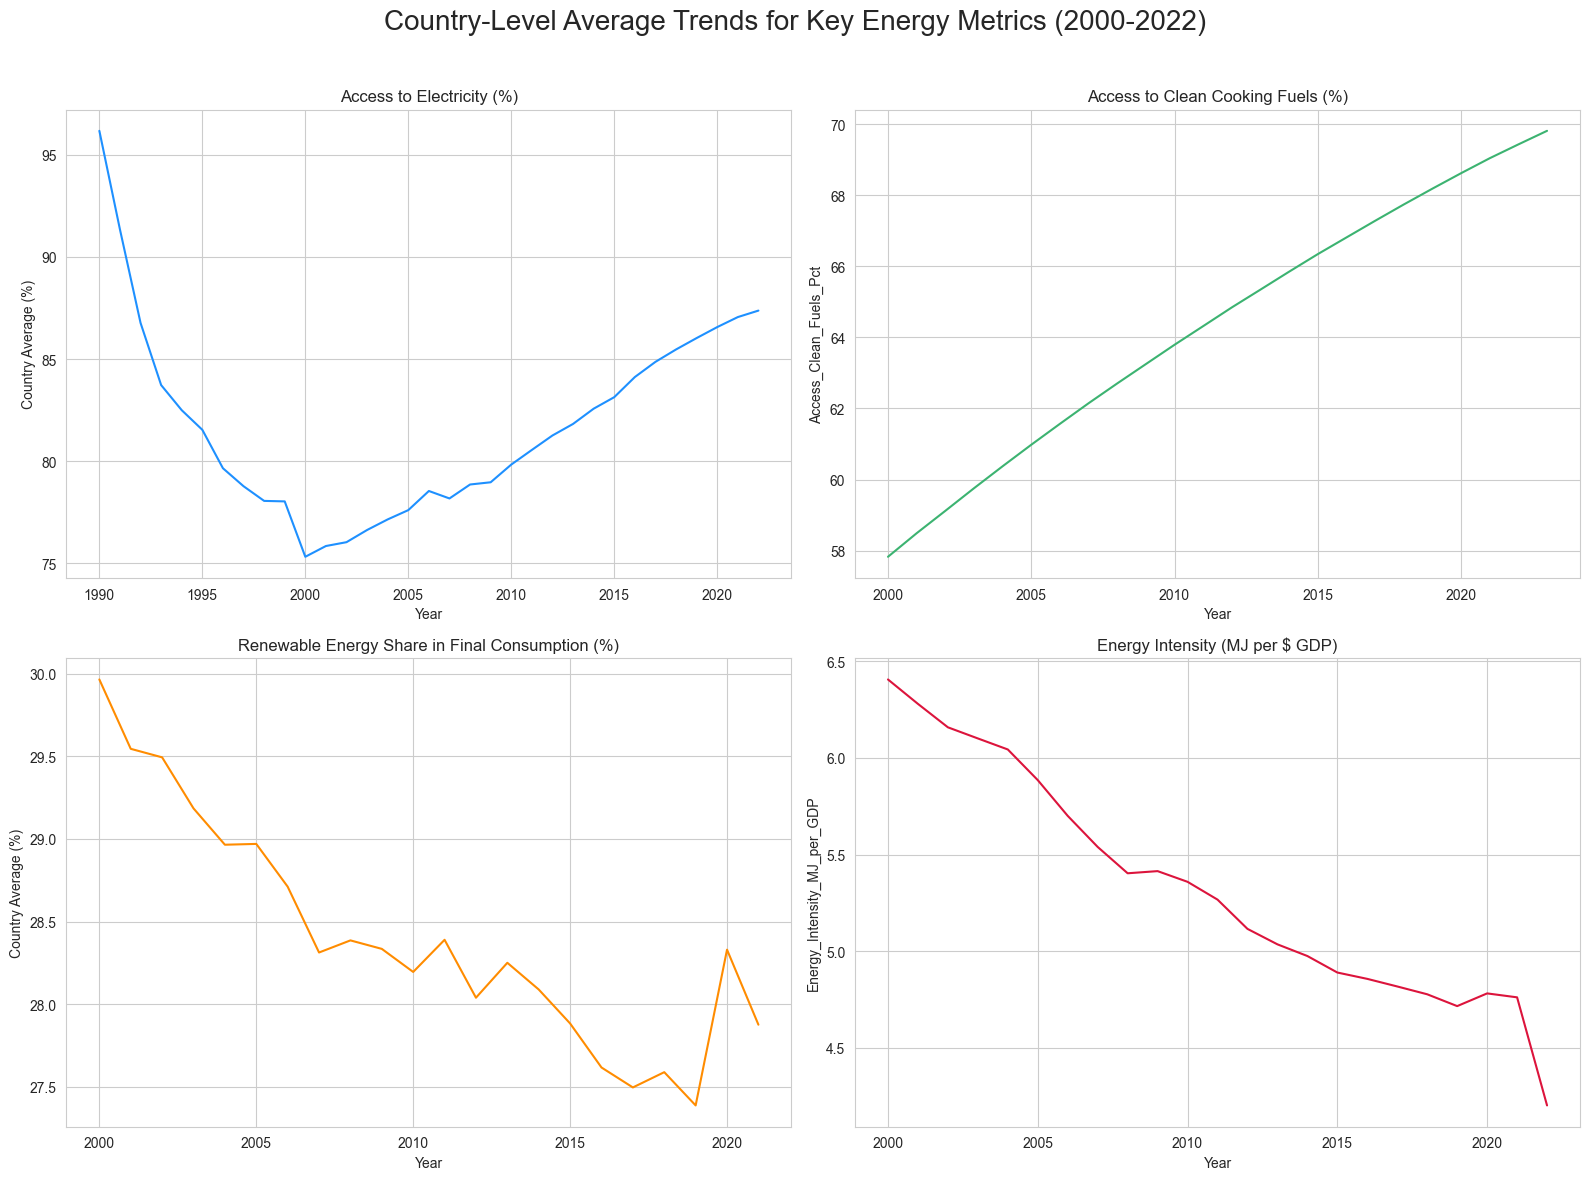

In [14]:
project_root = Path.cwd().parent
reports_dir = project_root / "reports" / "figures"
try:

    # Filter for countries only by checking the length of the 'Code'
    countries_only_df = df.dropna(subset=['Code'])
    countries_only_df = countries_only_df[countries_only_df['Code'].str.len() == 3].copy()
    
    print(countries_only_df.head(100))

    time_series_cols = [
        'Access_to_Electricity_Pct', 'Access_Clean_Fuels_Pct', 
        'Renewable_Energy_Share_Pct', 'Energy_Intensity_MJ_per_GDP'
    ]
    
    valid_cols = [col for col in time_series_cols if col in countries_only_df.columns]
    yearly_trends = countries_only_df.groupby('Year')[valid_cols].mean().reset_index()

    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    fig.suptitle('Country-Level Average Trends for Key Energy Metrics (2000-2022)', fontsize=20)

    # Plotting logic for each subplot
    sns.lineplot(ax=axes[0, 0], data=yearly_trends, x='Year', y='Access_to_Electricity_Pct', color='dodgerblue')
    axes[0, 0].set_title('Access to Electricity (%)')
    axes[0, 0].set_ylabel('Country Average (%)')

    sns.lineplot(ax=axes[0, 1], data=yearly_trends, x='Year', y='Access_Clean_Fuels_Pct', color='mediumseagreen')
    axes[0, 1].set_title('Access to Clean Cooking Fuels (%)')

    sns.lineplot(ax=axes[1, 0], data=yearly_trends, x='Year', y='Renewable_Energy_Share_Pct', color='darkorange')
    axes[1, 0].set_title('Renewable Energy Share in Final Consumption (%)')
    axes[1, 0].set_ylabel('Country Average (%)')

    sns.lineplot(ax=axes[1, 1], data=yearly_trends, x='Year', y='Energy_Intensity_MJ_per_GDP', color='crimson')
    axes[1, 1].set_title('Energy Intensity (MJ per $ GDP)')

    plt.tight_layout(rect=[0, 0, 1, 0.96])
    
    chart_filepath = reports_dir / "country_level_trends.png"
    plt.savefig(chart_filepath)
    
    print(f"✅ Chart with country-only data successfully generated and saved to:\n{chart_filepath}")

except Exception as e:
    print(f"An unexpected error occurred: {e}")

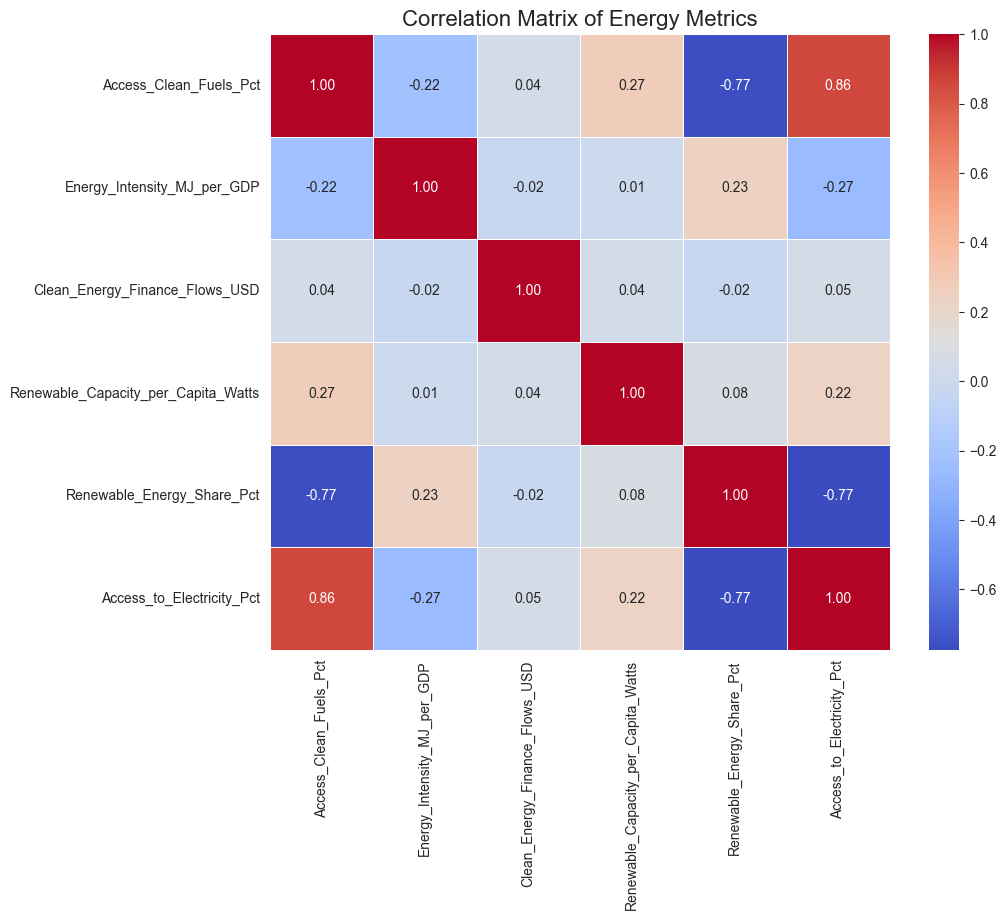

In [6]:
# Select only the numeric columns for correlation analysis
numeric_cols = df.select_dtypes(include=np.number).drop(columns='Year')

# Calculate the correlation matrix
correlation_matrix = numeric_cols.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Energy Metrics', fontsize=16)
plt.show()

In [7]:
try:
    
    specific_year = 2021
    df_2021 = df[df['Year'] == specific_year].dropna(subset=['Access_to_Electricity_Pct', 'Renewable_Energy_Share_Pct'])

    # --- Access to Electricity Analysis for 2021 ---
    top_10_electricity = df_2021.sort_values(by='Access_to_Electricity_Pct', ascending=False).head(10)
    bottom_10_electricity = df_2021[df_2021['Access_to_Electricity_Pct'] < 100].sort_values(by='Access_to_Electricity_Pct', ascending=True).head(10)

    print(f"--- Analysis for the year {specific_year} ---")

    print("\n🌍 Top 10 Countries/Regions by Access to Electricity (%):")
    # Using .to_string() for clean alignment
    print(top_10_electricity[['Entity', 'Access_to_Electricity_Pct']].to_string(index=False))

    print("\n💔 Bottom 10 Countries by Access to Electricity (%):")
    print(bottom_10_electricity[['Entity', 'Access_to_Electricity_Pct']].to_string(index=False))


    # --- Renewable Energy Share Analysis for 2021 ---
    top_10_renewables = df_2021.sort_values(by='Renewable_Energy_Share_Pct', ascending=False).head(10)
    bottom_10_renewables = df_2021.sort_values(by='Renewable_Energy_Share_Pct', ascending=True).head(10)

    print("\n\n🌿 Top 10 Countries by Renewable Energy Share (%):")
    print(top_10_renewables[['Entity', 'Renewable_Energy_Share_Pct']].to_string(index=False))

    print("\n🏭 Bottom 10 Countries by Renewable Energy Share (%):")
    print(bottom_10_renewables[['Entity', 'Renewable_Energy_Share_Pct']].to_string(index=False))

except FileNotFoundError:
    print("❌ Error: The file 'data/processed/affordable_and_clean_energy_merged.csv' was not found.")
    print("Please ensure you have run the data merging notebook first.")

--- Analysis for the year 2021 ---

🌍 Top 10 Countries/Regions by Access to Electricity (%):
                  Entity  Access_to_Electricity_Pct
             Isle of Man                      100.0
               Gibraltar                      100.0
                  Latvia                      100.0
                 Lebanon                      100.0
                 Ukraine                      100.0
           Liechtenstein                      100.0
               Lithuania                      100.0
              Luxembourg                      100.0
                   Macao                      100.0
Turks and Caicos Islands                      100.0

💔 Bottom 10 Countries by Access to Electricity (%):
                      Entity  Access_to_Electricity_Pct
                 South Sudan                        7.7
                     Burundi                       10.2
                        Chad                       11.3
                      Malawi                       14.2
  

✅ Chart successfully generated and saved to: d:\github\python projects\Analysis\sustainable_goal_affordable_ and_clean_renewable_enargy\Analysis\Affordable_Clean_Energy_Project\reports\figures\sri_lanka_electricity_access.png


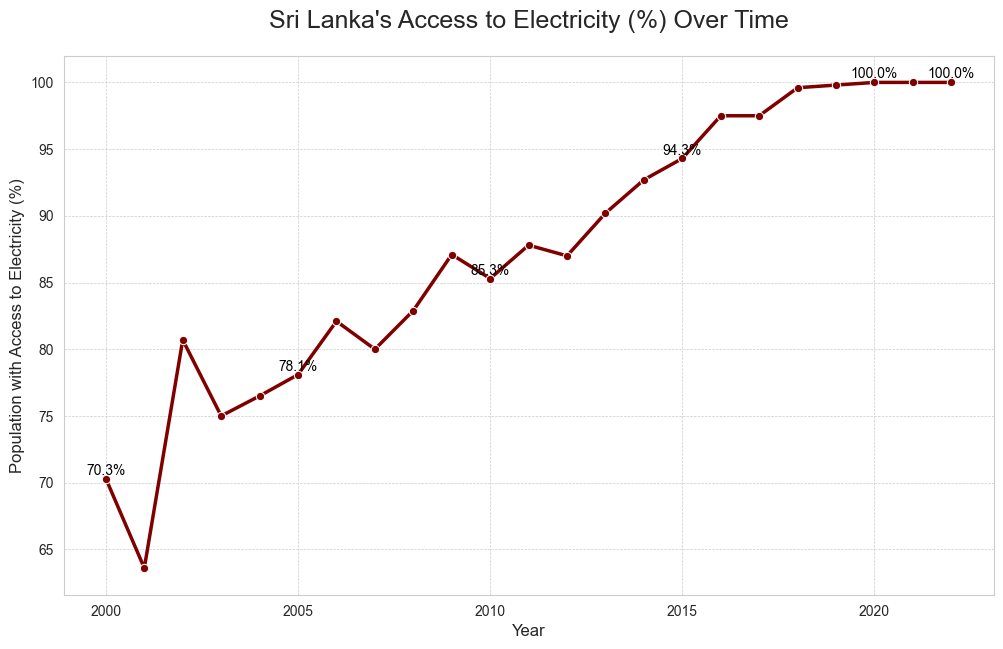

In [ ]:
try:
    # Define the path to where your processed data file should be

    # Filter the data to get only entries for Sri Lanka
    sri_lanka_df = df[df['Entity'] == 'Sri Lanka'].copy()
    
    # --- Data Preparation ---
    # Ensure columns are numeric and remove any missing values for this specific plot
    sri_lanka_df['Year'] = pd.to_numeric(sri_lanka_df['Year'], errors='coerce')
    sri_lanka_df['Access_to_Electricity_Pct'] = pd.to_numeric(sri_lanka_df['Access_to_Electricity_Pct'], errors='coerce')
    sri_lanka_df.dropna(subset=['Year', 'Access_to_Electricity_Pct'], inplace=True)

    # --- Chart Creation ---
    plt.figure(figsize=(12, 7))
    plot = sns.lineplot(data=sri_lanka_df, x='Year', y='Access_to_Electricity_Pct', 
                        marker='o', color='maroon', linewidth=2.5)
    
    # Add data labels to the chart for clarity
    for _, row in sri_lanka_df.iterrows():
        # Add a label every 5 years and for the first and last data points
        if int(row['Year']) % 5 == 0 or row['Year'] == sri_lanka_df['Year'].min() or row['Year'] == sri_lanka_df['Year'].max():
             plt.text(row['Year'], row['Access_to_Electricity_Pct'] + 0.3, f"{row['Access_to_Electricity_Pct']:.1f}%", 
                     ha='center', color='black')

    # Set professional titles and labels
    plt.title("Sri Lanka's Access to Electricity (%) Over Time", fontsize=18, pad=20)
    plt.xlabel("Year", fontsize=12)
    plt.ylabel("Population with Access to Electricity (%)", fontsize=12)
    plt.ylim(min(70, sri_lanka_df['Access_to_Electricity_Pct'].min() - 2), 102) # Adjust y-axis for better visibility
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)

    # --- Save the Figure ---
    # Define the output directory and create it if it doesn't exist
    output_dir = Path.cwd().parent / "reports" / "figures"
    output_dir.mkdir(parents=True, exist_ok=True)
    output_filepath = output_dir / "sri_lanka_electricity_access.png"
    plt.savefig(output_filepath)
    
    print(f"✅ Chart successfully generated and saved to: {output_filepath}")

except Exception as e:
    print(f"An error occurred: {e}")

✅ Chart successfully generated and saved to: d:\github\python projects\Analysis\sustainable_goal_affordable_ and_clean_renewable_enargy\Analysis\Affordable_Clean_Energy_Project\reports\figures\sri_lanka_Renewable_Energy_Share_Pct.png


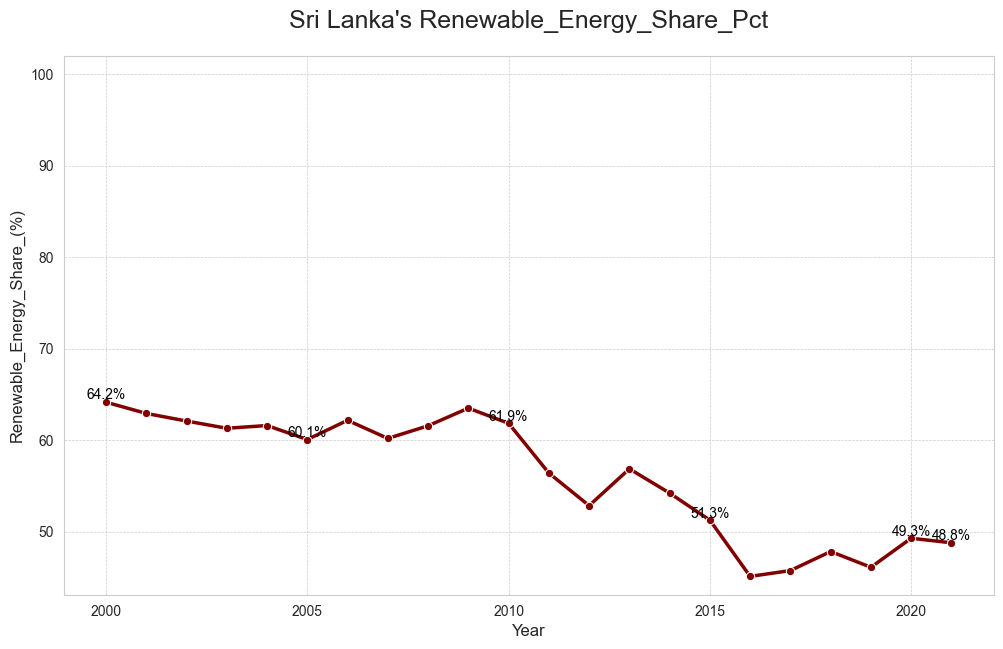

In [ ]:
try:
    # Define the path to where your processed data file should be

    # Filter the data to get only entries for Sri Lanka
    sri_lanka_df = df[df['Entity'] == 'Sri Lanka'].copy()
    
    # --- Data Preparation ---
    # Ensure columns are numeric and remove any missing values for this specific plot
    sri_lanka_df['Year'] = pd.to_numeric(sri_lanka_df['Year'], errors='coerce')
    sri_lanka_df['Renewable_Energy_Share_Pct'] = pd.to_numeric(sri_lanka_df['Renewable_Energy_Share_Pct'], errors='coerce')
    sri_lanka_df.dropna(subset=['Year', 'Renewable_Energy_Share_Pct'], inplace=True)

    # --- Chart Creation ---
    plt.figure(figsize=(12, 7))
    plot = sns.lineplot(data=sri_lanka_df, x='Year', y='Renewable_Energy_Share_Pct', 
                        marker='o', color='maroon', linewidth=2.5)
    
    # Add data labels to the chart for clarity
    for _, row in sri_lanka_df.iterrows():
        # Add a label every 5 years and for the first and last data points
        if int(row['Year']) % 5 == 0 or row['Year'] == sri_lanka_df['Year'].min() or row['Year'] == sri_lanka_df['Year'].max():
             plt.text(row['Year'], row['Renewable_Energy_Share_Pct'] + 0.3, f"{row['Renewable_Energy_Share_Pct']:.1f}%", 
                     ha='center', color='black')

    # Set professional titles and labels
    plt.title("Sri Lanka's Renewable_Energy_Share_Pct", fontsize=18, pad=20)
    plt.xlabel("Year", fontsize=12)
    plt.ylabel("Renewable_Energy_Share_(%)", fontsize=12)
    plt.ylim(min(70, sri_lanka_df['Renewable_Energy_Share_Pct'].min() - 2), 102) # Adjust y-axis for better visibility
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)

    # --- Save the Figure ---
    # Define the output directory and create it if it doesn't exist
    output_dir = Path.cwd().parent / "reports" / "figures"
    output_dir.mkdir(parents=True, exist_ok=True)
    output_filepath = output_dir / "sri_lanka_Renewable_Energy_Share_Pct.png"
    plt.savefig(output_filepath)
    
    print(f"✅ Chart successfully generated and saved to: {output_filepath}")
except Exception as e:
    print(f"An error occurred: {e}")

✅ Chart successfully generated and saved to: d:\github\python projects\Analysis\sustainable_goal_affordable_ and_clean_renewable_enargy\Analysis\Affordable_Clean_Energy_Project\reports\figures\World_Renewable_Energy_Share_Pct.png


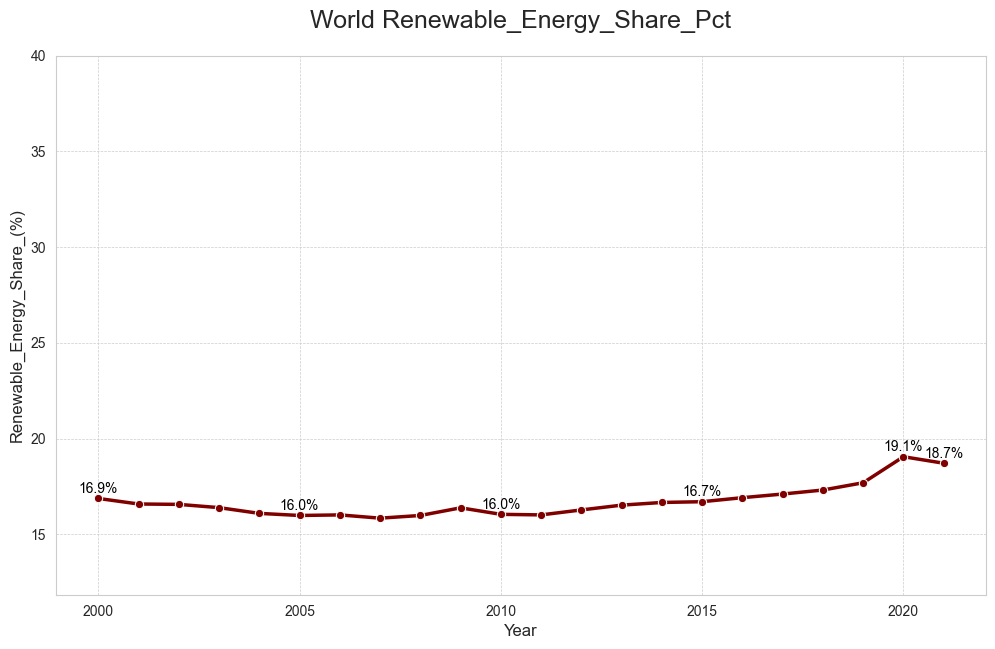

In [20]:
try:
    # Define the path to where your processed data file should be

    # Filter the data to get only entries for Sri Lanka
    world_df = df[df['Entity'] == 'World'].copy()
    
    # --- Data Preparation ---
    # Ensure columns are numeric and remove any missing values for this specific plot
    world_df['Year'] = pd.to_numeric(world_df['Year'], errors='coerce')
    world_df['Renewable_Energy_Share_Pct'] = pd.to_numeric(world_df['Renewable_Energy_Share_Pct'], errors='coerce')
    world_df.dropna(subset=['Year', 'Renewable_Energy_Share_Pct'], inplace=True)

    # --- Chart Creation ---
    plt.figure(figsize=(12, 7))
    plot = sns.lineplot(data=world_df, x='Year', y='Renewable_Energy_Share_Pct', 
                        marker='o', color='maroon', linewidth=2.5)
    
    # Add data labels to the chart for clarity
    for _, row in world_df.iterrows():
        # Add a label every 5 years and for the first and last data points
        if int(row['Year']) % 5 == 0 or row['Year'] == world_df['Year'].min() or row['Year'] == world_df['Year'].max():
             plt.text(row['Year'], row['Renewable_Energy_Share_Pct'] + 0.3, f"{row['Renewable_Energy_Share_Pct']:.1f}%", 
                     ha='center', color='black')

    # Set professional titles and labels
    plt.title("World Renewable_Energy_Share_Pct", fontsize=18, pad=20)
    plt.xlabel("Year", fontsize=12)
    plt.ylabel("Renewable_Energy_Share_(%)", fontsize=12)
    plt.ylim(min(50, world_df['Renewable_Energy_Share_Pct'].min() - 4), 40) # Adjust y-axis for better visibility
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)

    # --- Save the Figure ---
    # Define the output directory and create it if it doesn't exist
    output_dir = Path.cwd().parent / "reports" / "figures"
    output_dir.mkdir(parents=True, exist_ok=True)
    output_filepath = output_dir / "World_Renewable_Energy_Share_Pct.png"
    plt.savefig(output_filepath)
    
    print(f"✅ Chart successfully generated and saved to: {output_filepath}")
except Exception as e:
    print(f"An error occurred: {e}")